In [1]:
import time
import re
import pandas as pd
import numpy as np
import nltk
from nltk.stem.porter import *
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 4.7MB/s 


In [3]:
import requests
import json
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [4]:
analyser.polarity_scores("The movie is good")

{'compound': 0.4404, 'neg': 0.0, 'neu': 0.508, 'pos': 0.492}

In [5]:
analyser.polarity_scores("The movie is bad")

{'compound': -0.5423, 'neg': 0.538, 'neu': 0.462, 'pos': 0.0}

In [6]:
analyser.polarity_scores("The movie is very bad")

{'compound': -0.5849, 'neg': 0.487, 'neu': 0.513, 'pos': 0.0}

In [7]:
analyser.polarity_scores("The movie is VERY BAD")

{'compound': -0.7398, 'neg': 0.568, 'neu': 0.432, 'pos': 0.0}

In [8]:
analyser.polarity_scores("The movie is VERY BAD!!!")

{'compound': -0.7984, 'neg': 0.605, 'neu': 0.395, 'pos': 0.0}

In [9]:
def sentiment_analyzer_scores(text):
    score = analyser.polarity_scores(text)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1

In [10]:
sentiment_analyzer_scores("The movie is VERY BAD!!!")

-1

In [11]:
sentiment_analyzer_scores("The movie is VERY BAD!!!")

-1

In [12]:
sentiment_analyzer_scores("The movie is long")

0

In [13]:
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)

    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

In [14]:
# #Positive - Original dataset
# tw_pos = df_tw[df_tw['Sentiment'] == 1]['SentimentText']
# word_cloud(tw_pos)

In [15]:
!pip install googletrans

     |████████████████████████████████| 61kB 3.5MB/s 
     |████████████████████████████████| 921kB 7.8MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 71kB 5.1MB/s 
     |████████████████████████████████| 102kB 8.5MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=34e0a2eca4adbdab817e9eb5cbb61dce1b572bbe37ed3a6f900f1e24a7216b3d
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=55efd2dc80205f0526e6636fef13b0f940fbebcf83625ec5f0d1adce856dd8a9
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [16]:
from googletrans import Translator
translator = Translator()

In [17]:
translator.translate('hola, todo bien?').text

'hi, all good?'

In [18]:
text = translator.translate('la pelicula es mala').text
analyser.polarity_scores(text)

{'compound': -0.5423, 'neg': 0.538, 'neu': 0.462, 'pos': 0.0}

In [19]:
text

'the movie is bad'

In [20]:
trans = translator.translate('hola, todo bien?')
type(trans.text)

str

In [21]:
def sentiment_analyzer_scores(text, engl=True):
    if engl:
        trans = text
    else:
        trans = translator.translate(text).text

    score = analyser.polarity_scores(trans)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1

In [22]:
text = 'the movie is very good'
sentiment_analyzer_scores(text)

1

In [23]:
text = 'muy feo esa película '
sentiment_analyzer_scores(text, False)

-1

In [24]:
text = 'es muy mala la peli'
sentiment_analyzer_scores(text, False)

-1

In [25]:
text = 'o dia esta bem ruim'
sentiment_analyzer_scores(text, False)

-1

In [26]:
translator.translate('o dia esta lindo, com muito sol').text

'the day is beautiful, very sunny'

In [27]:
text = 'malo'
sentiment_analyzer_scores(text, False)

0

In [28]:
import sys
import tweepy
import csv


In [29]:
consumer_key = 'UxXBBuFdOgLgbPKsaXj8zgxOP'
consumer_secret = 'KEMJrbqYip5SWpWiKzToEdiTNCf2e7le7RarIjJqgzYjf6iegJ'
access_token = '930906726420963329-ogVx941rtkV5U0hNttJ9rBhcKq5mB16'
access_token_secret = 'jO9gpl5RPJk3jGl8JvIzIEzjlnIyAvKosa6UMOwBTHs7J'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [30]:
tweets = api.user_timeline('@ingenieriaUDD_', count=5, tweet_mode='extended')
for t in tweets:
    print(t.full_text)
    print()

RT @leoferres: So, I published a blog post about mobile phone streams. Serious title: "Mobile Phone Streams", obligatory click-bait: "GPS i…

Compartimos interesante opinión titulada: "Hacia un nuevo modelo educativo basado en la innovación", donde se destaca la trasformación digital como uno de nuevos desafíos en educación.
#edicación #innovación #ingeniería #desarrollo https://t.co/BH1GZSnawl

@DFinanciero destaca la unidad @UDDVentures, la cual "está enfocada en guiar y acompañar a emprendedores y Pymes en el camino para evolucionar sus empresas".

#innovación #UDD #desarrollo #emprendimiento #Pymes #estrategiacomercial #B2B
https://t.co/VGtyhNb394

@DFinanciero destaca la unidad @UDDVentures,  la cual "está enfocada en guiar y acompañar a emprendedores y Pymes en el camino para evolucionar sus empresas".

#innovación #UDD #desarrollo #emprendimiento #Pymes #estrategiacomercial #B2B
https://t.co/VGtyhNb394

Diario @DFinanciero destaca resultados de la reciente entrega del estudio de

In [31]:
def list_tweets(user_id, count, prt=False):
    tweets = api.user_timeline(
        "@" + user_id, count=count, tweet_mode='extended')
    tw = []
    for t in tweets:
        tw.append(t.full_text)
        if prt:
            print(t.full_text)
            print()
    return tw

In [32]:
user_id = 'realDonaldTrump' 
count=200

In [33]:
tw_trump = list_tweets(user_id, count)

In [34]:
type(tw_trump)

list

In [35]:
tw_trump[2]

'The Radical Left Democrats, who totally control Biden, will destroy our Country as we know it. Unimaginably bad things would happen to America. Look at Portland, where the pols are just fine with 50 days of anarchy. We sent in help. Look at New York, Chicago, Philadelphia. NO!'

**LIMPIAR** **DATA**

In [36]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

In [37]:
def clean_tweets(lst):
    # remove twitter Return handles (RT @xxx:)
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")
    # remove twitter handles (@xxx)
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")
    # remove URL links (httpxxx)
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")
    # remove special characters, numbers, punctuations (except for #)
    lst = np.core.defchararray.replace(lst, "[^a-zA-Z#]", " ")

    return lst

In [38]:
tw_trump = clean_tweets(tw_trump)

In [39]:
tw_trump[2]

'The Radical Left Democrats, who totally control Biden, will destroy our Country as we know it. Unimaginably bad things would happen to America. Look at Portland, where the pols are just fine with 50 days of anarchy. We sent in help. Look at New York, Chicago, Philadelphia. NO!'

In [40]:
sentiment_analyzer_scores(tw_trump[2])

-1

In [41]:
def anl_tweets(lst, title='Tweets Sentiment', engl=False ):
    sents = []
    for tw in lst:
        try:
            st = sentiment_analyzer_scores(tw, engl)
            sents.append(st)
        except:
            sents.append(0)
    ax = sns.distplot(
        sents,
        kde=False,
        bins=3)
    ax.set(xlabel='Negative                Neutral                 Positive',
           ylabel='#Tweets',
          title="Tweets of @"+title)
    return sents

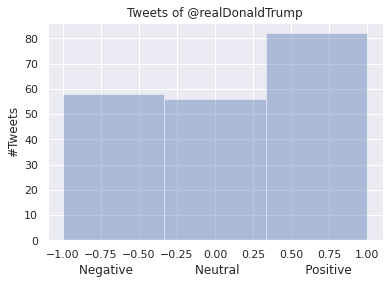

In [42]:
tw_trump_sent = anl_tweets(tw_trump, user_id)

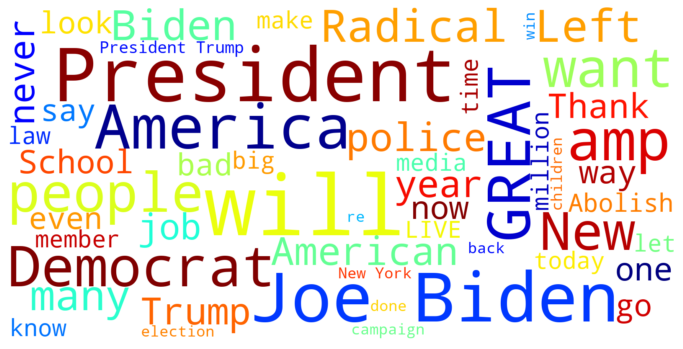

In [43]:
word_cloud(tw_trump)

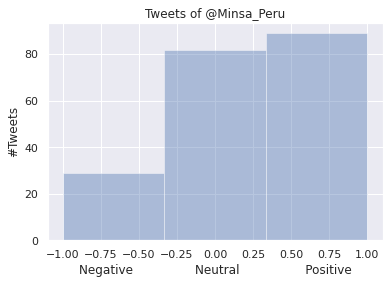

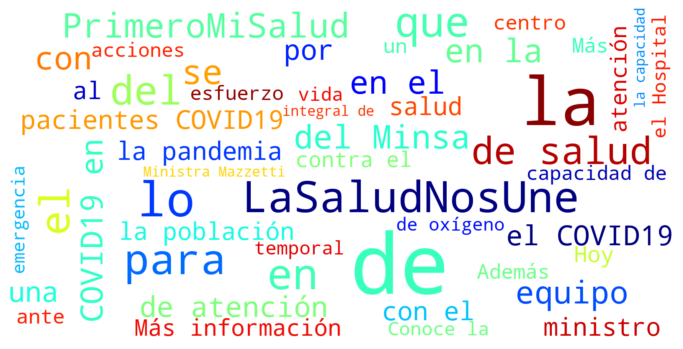

In [44]:
user_id = 'Minsa_Peru' 
tw_sanders = list_tweets(user_id, count)
tw_sanders = clean_tweets(tw_sanders)
tw_sanders_sent = anl_tweets(tw_sanders, user_id)
word_cloud(tw_sanders)

In [45]:
def twitter_stream_listener(file_name,
                            filter_track,
                            follow=None,
                            # locations=None,
                            locations = [-84.64,-20.2,-68.65,-0.04],
                            languages= None,
                            time_limit=20):
    class CustomStreamListener(tweepy.StreamListener):
        def __init__(self, time_limit):
            self.start_time = time.time()
            self.limit = time_limit
            # self.saveFile = open('abcd.json', 'a')
            super(CustomStreamListener, self).__init__()

        def on_status(self, status):
            if (time.time() - self.start_time) < self.limit:
                print(".", end="")
                # Writing status data
                with open(file_name, 'a') as f:
                    writer = csv.writer(f)
                    writer.writerow([
                        status.author.screen_name, status.created_at,
                        status.text
                    ])
            else:
                print("\n\n[INFO] Closing file and ending streaming")
                return False

        def on_error(self, status_code):
            if status_code == 420:
                print('Encountered error code 420. Disconnecting the stream')
                # returning False in on_data disconnects the stream
                return False
            else:
                print('Encountered error with status code: {}'.format(
                    status_code))
                return True  # Don't kill the stream

        def on_timeout(self):
            print('Timeout...')
            return True  # Don't kill the stream

    # Writing csv titles
    print(
        '\n[INFO] Open file: [{}] and starting {} seconds of streaming for {}\n'
        .format(file_name, time_limit, filter_track))
    with open(file_name, 'w') as f:
        writer = csv.writer(f)
        writer.writerow(['author', 'date', 'text'])

    streamingAPI = tweepy.streaming.Stream(
        auth, CustomStreamListener(time_limit=time_limit))
    streamingAPI.filter(
        track=filter_track,
        follow=follow,
        locations=locations,
        languages=languages,
    )
    f.close()

In [46]:
filter_track = ['covid', 'coronavirus', 'cuarentena', 'peru', 'puno']
file_name = 'covid_coronavirus.csv'
twitter_stream_listener (file_name, filter_track, time_limit=60)


[INFO] Open file: [covid_coronavirus.csv] and starting 60 seconds of streaming for ['covid', 'coronavirus', 'cuarentena', 'peru', 'puno']

............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [47]:

file_name = 'covid_coronavirus.csv'
df_tws = pd.read_csv(file_name)
df_tws.shape

(2988, 3)

In [48]:
df_tws.head()

,author,date,text
0,Anjani99056308,2020-07-19 19:15:05,RT @rahulkanwal: Poor health infra puts 60% In...
1,BernardodeGalv3,2020-07-19 19:15:05,RT @LadyCrema: #ULTIMAHORA\nMotín en el asenta...
2,JohnCla999,2020-07-19 19:15:05,RT @JohnCla999: Dispersal of the coronavirus i...
3,damien1939,2020-07-19 19:15:05,"RT @TheDemCoalition: ""Many of those cases are ..."
4,ObamaBurnerAct,2020-07-19 19:15:05,This Chris Wallace interview is PURE GOLD!!! W...


In [49]:
df_tws['text'] =  clean_tweets(df_tws['text'])

In [50]:
df_tws.head()

,author,date,text
0,Anjani99056308,2020-07-19 19:15:05,Poor health infra puts 60% Indians at higher ...
1,BernardodeGalv3,2020-07-19 19:15:05,#ULTIMAHORA\nMotín en el asentamiento de inmi...
2,JohnCla999,2020-07-19 19:15:05,Dispersal of the coronavirus is now required....
3,damien1939,2020-07-19 19:15:05,"""Many of those cases are young people who wou..."
4,ObamaBurnerAct,2020-07-19 19:15:05,This Chris Wallace interview is PURE GOLD!!! W...


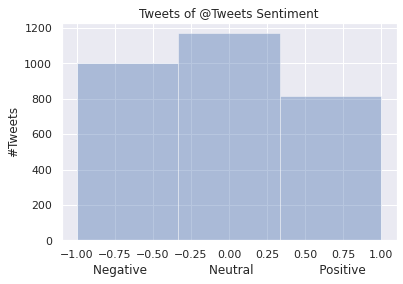

In [51]:
df_tws['sent'] = anl_tweets(df_tws.text)

In [52]:
df_tws.head()

,author,date,text,sent
0,Anjani99056308,2020-07-19 19:15:05,Poor health infra puts 60% Indians at higher ...,-1
1,BernardodeGalv3,2020-07-19 19:15:05,#ULTIMAHORA\nMotín en el asentamiento de inmi...,1
2,JohnCla999,2020-07-19 19:15:05,Dispersal of the coronavirus is now required....,1
3,damien1939,2020-07-19 19:15:05,"""Many of those cases are young people who wou...",0
4,ObamaBurnerAct,2020-07-19 19:15:05,This Chris Wallace interview is PURE GOLD!!! W...,-1


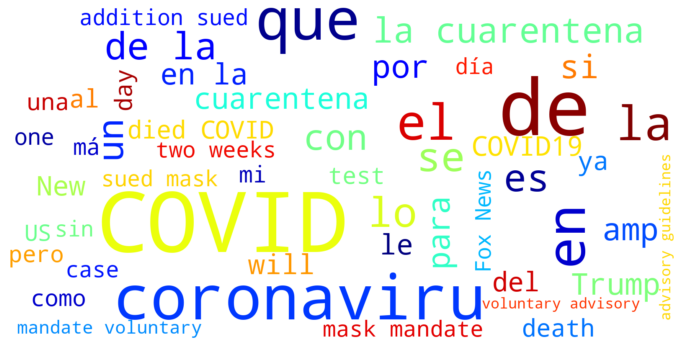

In [53]:
word_cloud(df_tws.text)

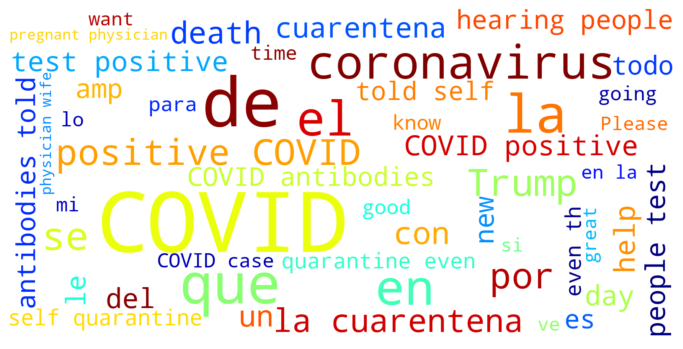

In [54]:
# Words in positive tweets
tws_pos = df_tws['text'][df_tws['sent'] == 1]
word_cloud(tws_pos)

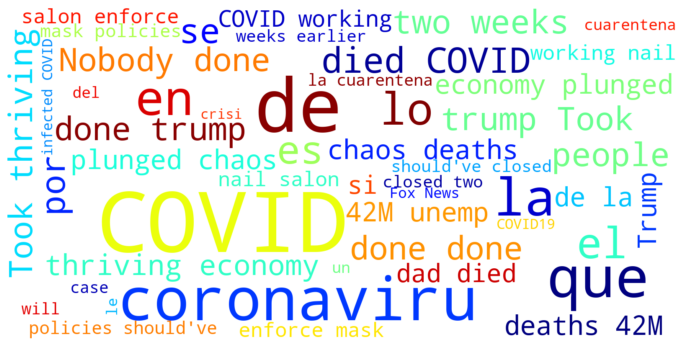

In [55]:
# Words in negative tweets
tws_pos = df_tws['text'][df_tws['sent'] == -1]
word_cloud(tws_pos)

In [56]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [57]:
# extracting hashtags from positive tweets

HT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])

# extracting hashtags from negative tweets
HT_negative = hashtag_extract(df_tws['text'][df_tws['sent'] == -1])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


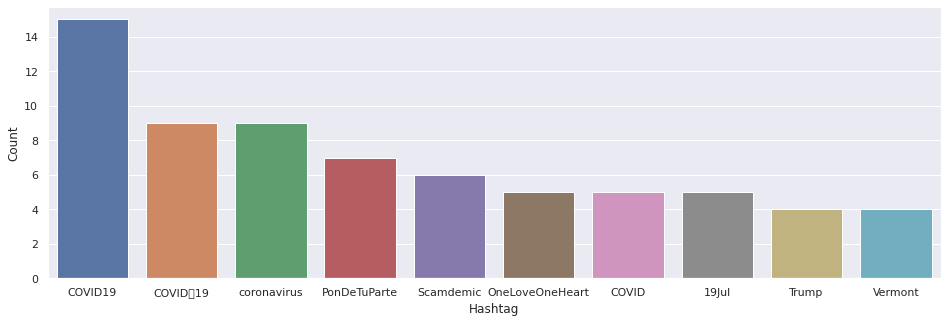

In [58]:
# Positive Tweets

a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


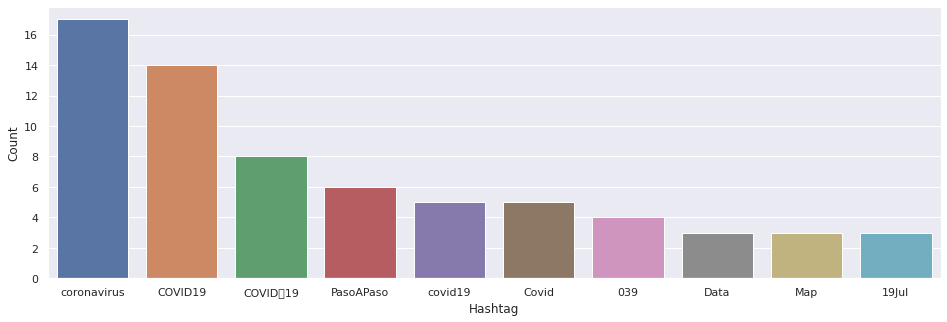

In [59]:
# Negative Tweets

b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()